[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Missing values:
 title      0
text       0
subject    0
date       0
label      0
dtype: int64


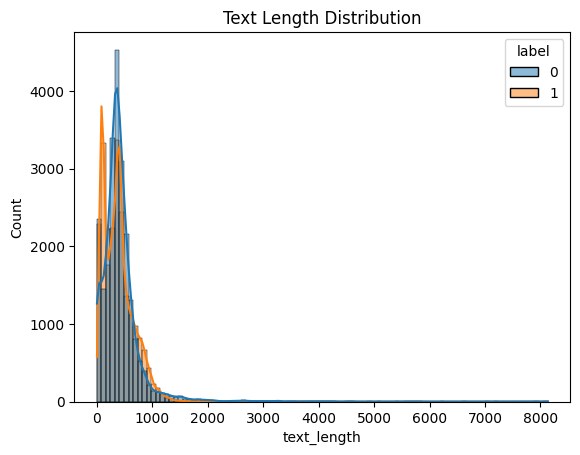

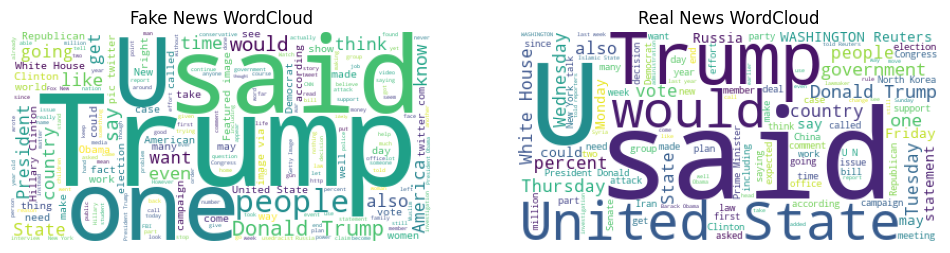

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load datasets
fake = pd.read_csv("Fake.csv")
real = pd.read_csv("True.csv")

# Add labels
fake["label"] = 0
real["label"] = 1

# Merge and shuffle
df = pd.concat([fake, real], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check for nulls
print("Missing values:\n", df.isnull().sum())

# Length of articles
df["text_length"] = df["text"].apply(lambda x: len(x.split()))
sns.histplot(data=df, x="text_length", hue="label", bins=100, kde=True)
plt.title("Text Length Distribution")
plt.show()

# Word cloud 
from wordcloud import WordCloud

text_fake = " ".join(fake["text"])
text_real = " ".join(real["text"])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(WordCloud(stopwords=stop_words, background_color="white").generate(text_fake))
plt.axis("off")
plt.title("Fake News WordCloud")

plt.subplot(1,2,2)
plt.imshow(WordCloud(stopwords=stop_words, background_color="white").generate(text_real))
plt.axis("off")
plt.title("Real News WordCloud")
plt.show()


Random Forest Classifier Accuracy: 0.9974


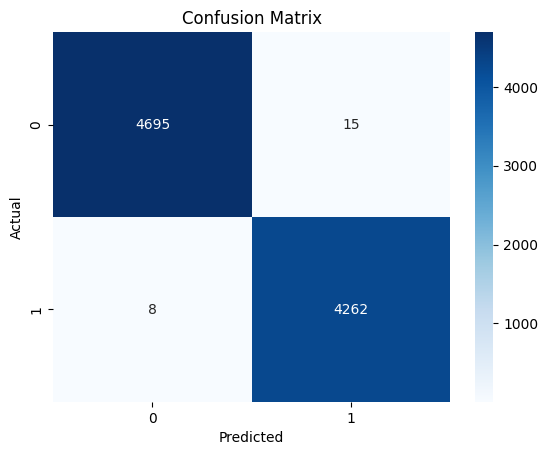

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import re

# Define the clean_text function
def clean_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Clean text
df["clean_text"] = df["text"].apply(clean_text)

# Train/test split
X = df["clean_text"]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_vec, y_train)

# Predictions and Evaluation
y_pred = rfc.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)

# Output accuracy
print(f"Random Forest Classifier Accuracy: {accuracy:.4f}")

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()